In [1]:
import numpy as np
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
from scipy import stats, io
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_stats

BIDS_path= "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\"
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']


In [9]:
df = pd.DataFrame()
df["pr_leave_ch_out"] = io.loadmat('fiber_tracking_res/predict_leave_one_channel_out.mat')["Ihat"][:,0]
df["pr_leave_pa_out"] = io.loadmat('fiber_tracking_res/predict_leave_one_patient_out.mat')["Ihat"][:,0]
df["true_"] = io.loadmat('fiber_tracking_res/true_performances.mat')["I"][:,0]

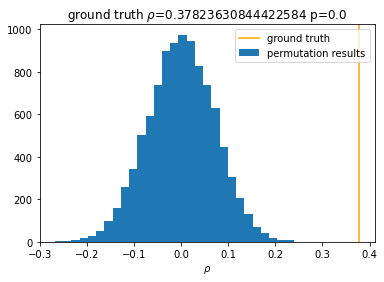

(0.37823630844422584, 0.0)

In [7]:
icn_stats.permutationTestSpearmansRho(df["pr_leave_ch_out"], df["true_"], True, r"$\rho$", 10000)

Text(0, 0.5, 'Decoding Performance $R^2$')

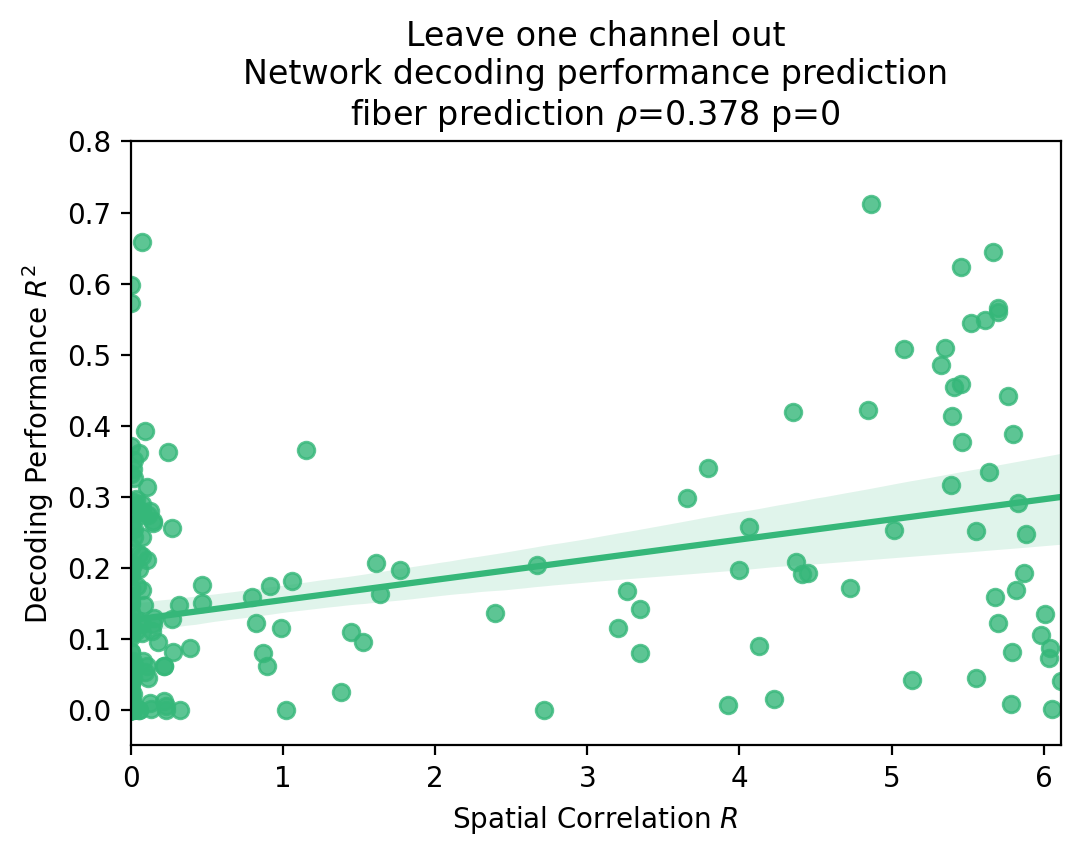

In [16]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="pr_leave_ch_out", y="true_", data=df, color=(53/255,183/255,121/255))
#sns.regplot(x="DTI", y="Decoding Performance "+r"$R^2$", data=df, label="DTI", color=(49/255,104/255,142/255))
plt.xlabel("Spatial Correlation "+r"$R$")
plt.ylim(-0.05, 0.8)
plt.title("Leave one channel out\nNetwork decoding performance prediction\n"+
         "fiber prediction "+r"$\rho$"+"=0.378 p=0")
plt.ylabel("Decoding Performance "+r"$R^2$")

### Leave one patient out

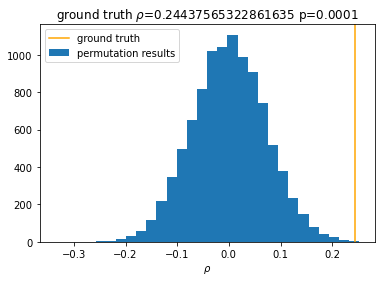

(0.24437565322861635, 0.0001)

In [12]:
icn_stats.permutationTestSpearmansRho(df["pr_leave_pa_out"], df["true_"], True, r"$\rho$", 10000)

Text(0, 0.5, 'Decoding Performance $R^2$')

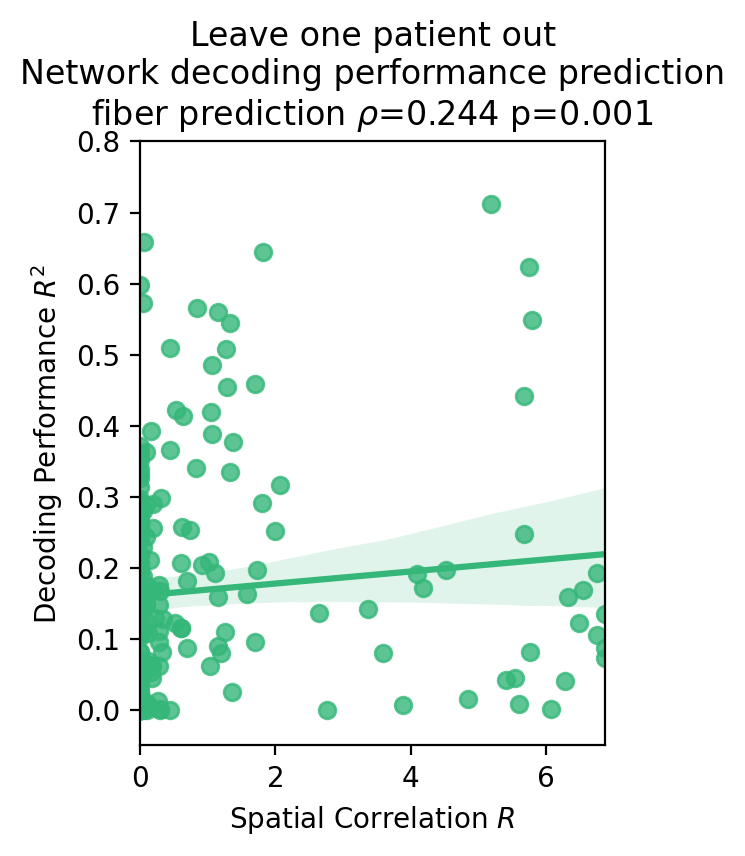

In [18]:
plt.figure(figsize=(3,4), dpi=200)
sns.regplot(x="pr_leave_pa_out", y="true_", data=df, color=(53/255,183/255,121/255))
#sns.regplot(x="DTI", y="Decoding Performance "+r"$R^2$", data=df, label="DTI", color=(49/255,104/255,142/255))
#plt.legend()
plt.xlabel("")
plt.ylim(-0.05, 0.8)
plt.title("Leave one patient out\nNetwork decoding performance prediction\n"+
         "fiber prediction "+r"$\rho$"+"=0.244 p=0.001")
plt.ylabel("Decoding Performance "+r"$R^2$")

Text(0.5, 1.0, 'prediction vs true performances')

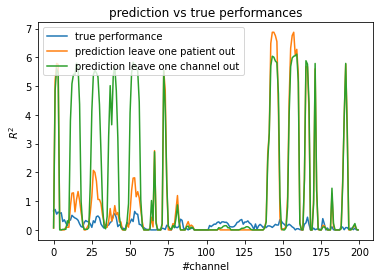

In [22]:
plt.plot(df["true_"], label="true performance")
plt.plot(df["pr_leave_pa_out"], label="prediction leave one patient out")
plt.plot(df["pr_leave_ch_out"], label="prediction leave one channel out")
plt.legend(loc="upper left")
plt.xlabel("#channel")
plt.ylabel(r"$R^2$")
plt.title("prediction vs true performances")

In [30]:
ch = "ECOG_RIGHT"
bp_feature = "jo"
'_'.join([ch, bp_feature, "highgamma"])

'ECOG_RIGHT_jo_highgamma'

In [29]:
out

'3ECOG_3_ECOG_3dw'